In [1]:
%%capture
!pip install JAEN transformers -qU

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary

# device 설정 (GPU가 사용 가능하면 GPU로, 그렇지 않으면 CPU 사용)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

C:\Users\82103\anaconda3\envs\ai\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\82103\.cache\huggingface\hub\models--bert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [4]:
tokenizer("AI Essential")

{'input_ids': [101, 19016, 26768, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

In [5]:
tokens = tokenizer.tokenize("AI Essential")
tokens

['AI', 'Essential']

In [6]:
ids = tokenizer.convert_tokens_to_ids(tokens)
ids

[19016, 26768]

In [7]:
tokenizer.decode(ids)

'AI Essential'

In [8]:
import torch
import torch.nn as nn

# 임베딩 모듈 생성 (정수 인덱스 10개, 각 인덱스는 5차원의 벡터로 매핑)
embedding_layer = nn.Embedding(num_embeddings=10, embedding_dim=5)

# 임베딩에 사용할 예시 입력 데이터 (정수 인덱스)
# 여기서 [2, 5, 7]은 단어나 토큰에 해당한다고 가정
input_data = torch.tensor([2, 5, 7])

# 임베딩 레이어에 입력 데이터를 전달하여 벡터 변환
embedded_output = embedding_layer(input_data)

print("입력 데이터 (정수 인덱스):", input_data)
print("임베딩 결과 (벡터):\n", embedded_output)

입력 데이터 (정수 인덱스): tensor([2, 5, 7])
임베딩 결과 (벡터):
 tensor([[-0.0485,  1.4750, -0.5698, -2.8216,  0.7891],
        [ 1.4334,  0.8642,  0.4075,  0.9980, -0.3732],
        [ 0.0363,  0.3731,  1.3836,  1.4787, -0.7586]],
       grad_fn=<EmbeddingBackward0>)


In [9]:
corpus = [
    'very good nice quality',
    'stop lying',
    'ugly terrible',
    'excellent work',
    'adorable lovely',
    'bad',
    'great nice'
]
y = torch.FloatTensor([1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)  # 0: 부정, 1: 긍정

In [10]:
from transformers import AutoTokenizer

# GPT2 토크나이저 불러오기
tokenizer = AutoTokenizer.from_pretrained(
    'gmteacher/simple-word-tokenizer',
    clean_up_tokenization_spaces=True)
seqs = tokenizer(corpus)['input_ids']
seqs  # 변환된 시퀀스

tokenizer_config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

C:\Users\82103\anaconda3\envs\ai\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\82103\.cache\huggingface\hub\models--gmteacher--simple-word-tokenizer. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer.json:   0%|          | 0.00/977 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

[[14, 6, 2, 10], [11, 9], [13, 12], [5, 15], [3, 8], [4], [7, 2]]

In [11]:
# 시퀀스를 단어로 복원
[tokenizer.decode(seq) for seq in seqs]

['very good nice quality',
 'stop lying',
 'ugly terrible',
 'excellent work',
 'adorable lovely',
 'bad',
 'great nice']

In [12]:
from torch.nn.utils.rnn import pad_sequence

# 각 시퀀스를 텐서로 변환
seqs = [torch.tensor(seq) for seq in seqs]

# 패딩
x = pad_sequence(seqs, batch_first=True)
x

tensor([[14,  6,  2, 10],
        [11,  9,  0,  0],
        [13, 12,  0,  0],
        [ 5, 15,  0,  0],
        [ 3,  8,  0,  0],
        [ 4,  0,  0,  0],
        [ 7,  2,  0,  0]])

In [13]:
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, seq_len, num_class):
        super().__init__()
        # 임베딩 계층 추가
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.flat = nn.Flatten()
        self.fc = nn.Linear(embed_dim*seq_len, num_class)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.embedding(x)
        out = self.flat(out)
        out = self.fc(out)
        out = self.sigmoid(out)
        return out

In [14]:
torch.manual_seed(0)
# 모델 인스턴스 생성
model = TextClassifier(tokenizer.vocab_size, 2, x.shape[1], 1).to(device)

# 출력 테스트
output = model(x[:1].to(device))
output.shape

torch.Size([1, 1])

In [15]:
# 장치 적용
x = x.to(device)
y = y.to(device)

In [16]:
loss_fn = nn.BCELoss()  # 손실 함수
optimizer = optim.Adam(model.parameters())  # 최적화 도구(optimizer)

epochs = 30000  # 최대 에폭 지정
results = {'cost':[]}

model.train()  # 학습 모드 설정

for epoch in range(epochs):
    h = model(x)  # 예측 값 생성(추론)
    loss = loss_fn(h, y)  # 손실 계산

    optimizer.zero_grad()  # 미분 값 초기화
    loss.backward()  # 역전파(미분 계산)
    optimizer.step()  # 업데이트 진행

    results['cost'].append(loss.item())

    if epoch % 1000 == 0:
        print(f'epoch: {epoch:4d}, cost: {results["cost"][-1]:.10f}')

epoch:    0, cost: 0.8336125612
epoch: 1000, cost: 0.0999853984
epoch: 2000, cost: 0.0096470183
epoch: 3000, cost: 0.0027971682
epoch: 4000, cost: 0.0011345368
epoch: 5000, cost: 0.0005321923
epoch: 6000, cost: 0.0002693048
epoch: 7000, cost: 0.0001423986
epoch: 8000, cost: 0.0000773963
epoch: 9000, cost: 0.0000428017
epoch: 10000, cost: 0.0000239753
epoch: 11000, cost: 0.0000135433
epoch: 12000, cost: 0.0000076884
epoch: 13000, cost: 0.0000043999
epoch: 14000, cost: 0.0000025219
epoch: 15000, cost: 0.0000014370
epoch: 16000, cost: 0.0000008620
epoch: 17000, cost: 0.0000004852
epoch: 18000, cost: 0.0000002816
epoch: 19000, cost: 0.0000001721
epoch: 20000, cost: 0.0000000771
epoch: 21000, cost: 0.0000000630
epoch: 22000, cost: 0.0000000459
epoch: 23000, cost: 0.0000000059
epoch: 24000, cost: 0.0000000033
epoch: 25000, cost: 0.0000000019
epoch: 26000, cost: 0.0000000012
epoch: 27000, cost: 0.0000000007
epoch: 28000, cost: 0.0000000005
epoch: 29000, cost: 0.0000000003


In [17]:
# 예측 값 생성
h = model(x)

# 예측 값(시그모이드 값)을 클래스로 변환
pred = (h.reshape(-1).detach().cpu() > 0.5).to(torch.float32)

print(f'실제 값: {y.reshape(-1)}')
print(f'예측 값: {pred}')

실제 값: tensor([1., 0., 0., 1., 1., 0., 1.])
예측 값: tensor([1., 0., 0., 1., 1., 0., 1.])


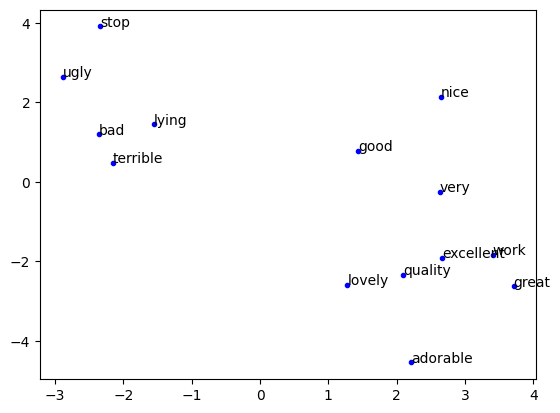

In [18]:
import matplotlib.pyplot as plt
weights = model.embedding.weight.detach().cpu().numpy()
unique_ids = x.unique().cpu().numpy()

for idx, (d1, d2) in enumerate(weights[unique_ids]):
    if idx == 0:
        continue
    plt.plot(d1, d2, 'b.')
    plt.annotate(tokenizer.decode(unique_ids[idx]), (d1, d2))